<a href="https://colab.research.google.com/github/MerkulovDaniil/AALS-for-CP/blob/master/cp_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
import math
%matplotlib inline
import matplotlib.pyplot as plt
import copy
from numpy import linalg
import time

def pltt(data, labels, colors, xlabel=None, ylabel=None, n_grid=100):
    n_algs = len(data)
    
    x_max = np.zeros(n_algs, np.float64)
    x_min = np.zeros(n_algs, np.float64)
    for k in range(n_algs):
        x_arrays, y_arrays = [], []
        
        if len(data[k])==1:
            y_arrays = data[k][0]
            for i in range(len(y_arrays)):
                x_arrays.append(np.arange(len(y_arrays[i])))
        elif len(data[k])==2:
            x_arrays = data[k][0]
            y_arrays = data[k][1]
            
        for i in range(len(x_arrays)):
            x_max[k] = min(x_arrays[i][-1], x_arrays[i-1][-1])
            x_min[k] = max(x_arrays[i][0], x_arrays[i-1][0])
    
    x_min=max(x_min)
    x_max=min(x_max)
    
    x_grid = np.linspace(x_min, x_max, n_grid)
    
    y_mean = np.zeros((n_algs, n_grid), np.float64)
    y_max = np.zeros((n_algs, n_grid), np.float64)
    y_min = np.zeros((n_algs, n_grid), np.float64)
    std_dev=np.zeros_like(y_mean)
    
    for k in range(n_algs):
        x_arrays, y_arrays = [], []
        
        if len(data[k])==1:
            y_arrays = data[k][0]
            for i in range(len(y_arrays)):
                x_arrays.append(np.arange(len(y_arrays[i])))
        elif len(data[k])==2:
            x_arrays = data[k][0]
            y_arrays = data[k][1]
        x_arrays, y_arrays = np.array(x_arrays), np.array(y_arrays)
        
        
        n=len(x_arrays) 
        
        y_interp = np.zeros((n, n_grid), np.float64)
        mask_array = []
        for i in range(n):
            mask = (x_arrays[i] >= x_min)*(x_arrays[i] <= x_max)
            mask_array.append(mask)
        
        for i in range(n):
            y_interp[i] = np.interp(x_grid, (x_arrays[i])[mask_array[i]], (y_arrays[i])[mask_array[i]])
            y_mean[k]+=y_interp[i]
        
        y_mean[k]/=n
        
        ### max-min var ###
        #y_max[k] = y_interp.max(axis=0)
        #y_min[k] = y_interp.min(axis=0)
        
        if n == 1:
            continue
            
        for i in range(n):
            std_dev[k] += (y_interp[i] - y_mean[k])**2
        std_dev[k] /= (n-1)
        std_dev[k] = np.sqrt(std_dev[k])
        #y_max[k] = y_mean[k] + std_dev[k]
        #y_min[k] = y_mean[k] - std_dev[k]
        #f_opt = min(y_min[k].min(), y_min[k-1].min())
    f_opt = y_mean.min()
    #y_mean-=f_opt

    ### std var ###
    y_max = y_mean + std_dev
    y_min = y_mean - std_dev
    
    fig, ax = plt.subplots()
    for k in range(n_algs):
        ax.semilogy(x_grid, y_mean[k], color= colors[k], label=labels[k])
        ax.fill_between(x_grid, y_min[k], y_max[k], color=colors[k], alpha=0.3, linewidth=0)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    leg = ax.legend();
    ax.grid(axis='both')

    plt.grid(True)
    # plt.savefig('/content/drive/My Drive/colab/ACC-SIN-std.png', dpi=200, bbox_extra_artists=(leg, ax), bbox_inches='tight')

In [ ]:
# channelName = 'RSE (i)'
channelName = 'RSE'

begin = 0
end = 20


dim = 30
rank = 10
noise = 1e-2
# rho = 0
# seed = 0 #group by

params={'dim' : dim,
        'rank' : rank,
        'noise' : noise}
        # 'rho' : rho}
        # 'seed' : seed}


succExperiments =  project.get_experiments(tag=['finished_successfully'])

algs=set()
for exp in succExperiments:
    algs.add(exp.get_system_properties()['name'])
algs=list(algs)

data_to_compare = []
for i in range(len(algs)):
    #data_to_compare.append([[]])
    data_to_compare.append([[],[]])

n_exp = 3

dim = 30
rank = 10
noise = 1e-2
rho = noise/10
seed = 0

params={'dim' : dim,
        'rank' : rank,
        'noise' : noise,
        'rho' : rho,
        'seed' : seed}


params_list = []
for s in range(n_exp):
    params['seed']=s
    params_list.append(params.copy())

data=[]
for  i, params in enumerate(params_list):
    data.append([])
    for j in range(len(algs)):
        data[i].append([])

    for exp in succExperiments:
        if not compare_dicts(params, exp.get_parameters()):
            continue

        df = exp.get_numeric_channels_values(channelName)
        x, y = df.to_numpy()[:,0], df.to_numpy()[:,1]
        mask = (x >= begin)*( x <= end)

        j=algs.index(exp.get_system_properties()['name'])
        data[i][j].append(x[mask])
        data[i][j].append(y[mask])



colors=[None]*len(algs)
# colors=None
colors=['red', 'blue', 'green', 'black', 'purple', 'orange']
pltr(data, labels=algs, colors=colors)

NameError: ignored

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
import math
# %pip install wandb -q
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output

!pip install neptune-client
import neptune
clear_output()
project = neptune.init(
    api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJiNzBmMzcxMy1mMDdlLTQyOGEtOGM3YS04ZTcyOWY5MjhjNjQifQ==',
    project_qualified_name='nazya/cp-l2'
)

In [ ]:
# Download experiments dashboard as pandas DataFrame
data = project.get_leaderboard()
#data = data.dropna(axis=1)
data = data.drop(labels=['owner', 'created', 'running_time'], axis=1)
data.tail()


,id,name,finished,notes,size,tags,channel_RSE,channel_RSE (i),channel_cpu,channel_memory,parameter_dim,parameter_noise,parameter_rank,parameter_rho,parameter_seed,parameter_sg_steps
16,CPL2-1179,FGR,None,,40554.0,[],0.828030,0.828030,0.959337,0.460915,30.0,0.01,10.0,0.001,0.0,1.0
17,CPL2-1180,FGR,None,,37146.0,[],0.828030,0.828030,0.922317,0.460854,30.0,0.01,10.0,0.001,0.0,1.0
18,CPL2-1181,FGR,None,,38375.0,"[finished_successfully, FGR]",0.009843,0.009843,94.463407,0.458652,30.0,0.01,10.0,0.001,0.0,1.0
19,CPL2-1182,FGR,None,,45450.0,[],0.247560,0.247560,0.964045,0.460701,30.0,0.01,10.0,0.001,1.0,1.0
20,CPL2-1183,FGR,None,,11034.0,[],0.247560,0.247560,0.940349,0.460556,30.0,0.01,10.0,0.001,1.0,1.0


In [ ]:
succExperiments =  project.get_experiments(tag=['finished_successfully'])
# succExperiments =  project.get_experiments(tag=['finished_successfully', '1'])
# succExperiments =  project.get_experiments(id=['CPL2-45', 'CPL2-44'])

In [ ]:
def compare_dicts(params, exp_params):
    for key in params:
        if exp_params[key] != params[key]:
            return False
    return True

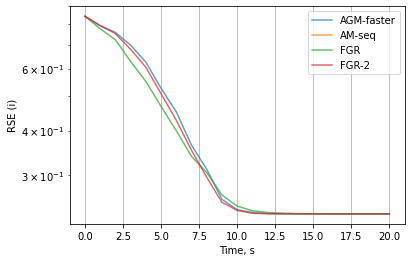

In [ ]:
dim = 30
rank = 10
noise = 1e-2
rho = noise/10
seed = 4

params={'dim' : dim,
        'rank' : rank,
        'noise' : noise,
        'rho' : rho,
        'seed' : seed}

succExperiments =  project.get_experiments(tag=['finished_successfully'])
# succExperiments =  project.get_experiments()

channelName = 'RSE (i)'
# channelName = 'RSE'
begin = 0
end = 20

for exp in succExperiments:
    if not compare_dicts(params, exp.get_parameters()):
        continue
    df = exp.get_numeric_channels_values(channelName)
    
    x, y = df.to_numpy()[:,0], df.to_numpy()[:,1]
    mask = (x >= begin)*( x <= end)
    x, y =x[mask], y[mask]

    label = exp.get_system_properties()['name']# +  ' ' + str(exp.get_parameters())
    plt.semilogy(x, y, label=label, alpha=0.7)

plt.grid()
plt.legend()
plt.xlabel(r'Time, s')
plt.ylabel(channelName)
plt.savefig(channelName+str(seed), dpi=200, bbox_inches='tight')
# plt.savefig('cp'.png', dpi=200, bbox_extra_artists=(leg, ax), bbox_inches='tight')

In [ ]:
enp.linspace(1,2,3)
import matplotlib.colors as mcolors
import numpy as np
from scipy.spatial.distance import cdist
import math
%matplotlib inline
import matplotlib.pyplot as plt
import copy
from numpy import linalg
import time

def pltr(data, labels, colors, xlabel=None, ylabel=None, n_grid=100):

    data_new=[]
    x_max=[]
    y_max=[]

    for i, params in enumerate(params_list):
        data_new=[]
        for j, alg in enumerate(data[i]):
            data_new.append([[],[]])
            x = data[i][j][0]
            y = data[i][j][1]
            if j == 0:
                x_max.append(x[-1])
                y_max.append(y[0])
            else:
                x_max[-1] = min(x_max[-1], x[-1])
                y_max[0] = max(y_max[-1], x[-1])

    n_algs = len(data_new)
    for i, params in enumerate(params_list):
        for j, alg in enumerate(data[i]):
            mask = data[i][j][0] < x_max[i]
            mask[np.argmin(mask)] = True
            data[i][j][0] = data[i][j][0][mask] / x_max[i]
            data[i][j][1] = data[i][j][1][mask]

            n = len(data[i][j][1])
            data[i][j][1] *= np.linspace(1/data[i][j][1][0], 1, n)
            

            data_new[j][0].append(data[i][j][0])
            data_new[j][1].append(data[i][j][1])
           
    data =  data_new    
    
    x_grid = np.linspace(0, 1, n_grid)
    
    y_mean = np.zeros((n_algs, n_grid), np.float64)
    y_max = np.zeros((n_algs, n_grid), np.float64)
    y_min = np.zeros((n_algs, n_grid), np.float64)
    std_dev=np.zeros_like(y_mean)
    fig, ax = plt.subplots()
    for k in range(n_algs):
        x_arrays = data[k][0]
        y_arrays = data[k][1]
        # x_arrays, y_arrays = np.array(x_arrays), np.array(y_arrays)
        
        n=len(x_arrays) 
        
        y_interp = np.zeros((n, n_grid), np.float64)
        
        for i in range(n):
            # print(x_arrays[i])
            y_interp[i] = np.interp(x_grid, x_arrays[i], y_arrays[i])
            # ax.semilogy(x_grid, y_interp[i], color= colors[k], label=None, alpha=0.2)
            y_mean[k]+=y_interp[i]
        
        y_mean[k]/=n
        
        ### max-min var ###
        y_max[k] = y_interp.max(axis=0)
        y_min[k] = y_interp.min(axis=0)
        
        if n == 1:
            continue
            
        for i in range(n):
            std_dev[k] += (y_interp[i] - y_mean[k])**2
        std_dev[k] /= (n-1)
        std_dev[k] = np.sqrt(std_dev[k])
        #y_max[k] = y_mean[k] + std_dev[k]
        #y_min[k] = y_mean[k] - std_dev[k]
        #f_opt = min(y_min[k].min(), y_min[k-1].min())
    f_opt = y_mean.min()
    #y_mean-=f_opt

    ### std var ###
    # y_max = y_mean + std_dev
    # y_min = y_mean - std_dev
    
    mask=x_grid<0.9
    for k in range(n_algs):
        ax.semilogy(x_grid[mask], y_mean[k][mask], color= colors[k], label=labels[k], alpha=0.8)
        
        # ax.fill_between(x_grid, y_min[k], y_max[k], color=colors[k], alpha=0.3, linewidth=0)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    leg = ax.legend();
    ax.grid(axis='both')

    plt.grid(True)
    plt.savefig('cp-av.png', dpi=200, bbox_extra_artists=(leg, ax), bbox_inches='tight')


array([1. , 1.5, 2. ])

In [ ]:

# channelName = 'RSE (i)'
channelName = 'RSE'

begin = 0
end = 20

succExperiments =  project.get_experiments(tag=['finished_successfully'])

algs=set()
for exp in succExperiments:
    algs.add(exp.get_system_properties()['name'])
algs=list(algs)

n_exp = 30

dim = 30
rank = 10
noise = 1e-2
rho = noise/10
seed = 0

params={'dim' : dim,
        'rank' : rank,
        'noise' : noise,
        'rho' : rho,
        'seed' : seed}


params_list = []
for s in range(n_exp):
    params['seed']=s
    params_list.append(params.copy())


data=[]
for i in range(len(params_list)):
    data.append([])

    for _ in range(len(algs)):
        data[i].append([])

params={'dim' : dim,
        'rank' : rank,
        'noise' : noise,
        'rho' : rho}
        # 'seed' : seed}

for exp in succExperiments:
    if not compare_dicts(params, exp.get_parameters()):
        continue
    try:
        i = params_list.index(exp.get_parameters())
    except ValueError:
        continue
    print(i)
    df = exp.get_numeric_channels_values(channelName)
    x, y = df.to_numpy()[:,0], df.to_numpy()[:,1]
    mask = (x >= begin)*( x <= end)

    j=algs.index(exp.get_system_properties()['name'])
    data[i][j].append(x[mask])
    data[i][j].append(y[mask])


# colors=['red', 'blue', 'green', 'yellow', 'orange', 'black']
colors = list(mcolors.BASE_COLORS)
colors = list(mcolors.TABLEAU_COLORS)




0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


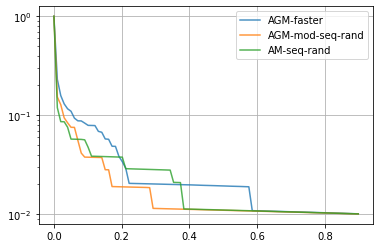

In [ ]:

pltr(data, labels=algs, colors=colors)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


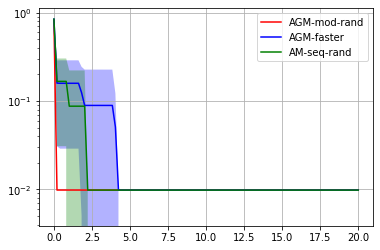

In [ ]:
# channelName = 'RSE (i)'
channelName = 'RSE'

begin = 0
end = 20


dim = 30
rank = 10
noise = 1e-2
# rho = 0
# seed = 0 #group by

params={'dim' : dim,
        'rank' : rank,
        'noise' : noise}
        # 'rho' : rho}
        # 'seed' : seed}


succExperiments =  project.get_experiments(tag=['finished_successfully'])

algs=set()
for exp in succExperiments:
    algs.add(exp.get_system_properties()['name'])
algs=list(algs)

data_to_compare = []
for i in range(len(algs)):
    #data_to_compare.append([[]])
    data_to_compare.append([[],[]])


for exp in succExperiments:
    if not compare_dicts(params, exp.get_parameters()):
        continue
    df = exp.get_numeric_channels_values(channelName)
    x, y = df.to_numpy()[:,0], df.to_numpy()[:,1]
    mask = (x >= begin)*( x <= end)

    i=algs.index(exp.get_system_properties()['name'])
    data_to_compare[i][0].append(x[mask])
    data_to_compare[i][1].append(y[mask])



colors=[None]*len(algs)
# colors=None
colors=['red', 'blue', 'green', 'black', 'purple', 'orange']
pltt(data_to_compare, labels=algs, colors=colors)

TypeError: ignored

In [ ]:
succExperiments =  project.get_experiments()#tag=['finished_successfully'])

channelName = 'RSE'
begin = 0
end = 20
seed = 0

for exp in succExperiments:
    if exp.get_parameters()['seed']!=seed:
        continue


    df = exp.get_numeric_channels_values(channelName)
    
    x = df.to_numpy()[:,0]
    y = df.to_numpy()[:,1]

    mask = (x >= begin)*( x <= end)
    x=x[mask]
    y=y[mask]


    label = exp.get_system_properties()['name']# +  ' ' + str(exp.get_parameters())
    plt.semilogy(x, y, label=label)

plt.grid()
plt.legend()
plt.xlabel(r'Time, s')
plt.ylabel(channelName)
plt.savefig(channelName, dpi=200, bbox_inches='tight')

In [ ]:
channelName = 'Function value'
begin = 0
end = 400

for exp in succExperiments:
    # exp.get_logs()['Observed accuracy']
    # exp.get_properties

    df = exp.get_numeric_channels_values(channelName)
    
    x = df.to_numpy()[:,0]
    y = df.to_numpy()[:,1]

    mask = (x >= begin)*( x <= end)
    x=x[mask]
    y=y[mask]


    label = exp.get_system_properties()['name']# +  ' ' + str(exp.get_parameters())
    plt.plot(x, y, label=label)

plt.grid()
plt.legend()
plt.xlabel(r'Time, s')
plt.ylabel(channelName)
plt.savefig(channelName, dpi=200, bbox_inches='tight')